## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  29.658790  1713.255626  0.464295   9.654974  1.428859
1  68.551980   305.390977  0.830341   6.788615  1.292897
2  66.846905   797.467515  0.131643   9.863291  0.913882
3  13.135298  1578.473968  0.064980  10.957110  1.334313
4  53.984870   240.352323  0.258816   2.346564  0.908233


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9132093	total: 62.8ms	remaining: 1m 2s
1:	learn: 0.9051554	total: 63.4ms	remaining: 31.6s
2:	learn: 0.8982030	total: 63.9ms	remaining: 21.2s
3:	learn: 0.8881921	total: 64.4ms	remaining: 16s
4:	learn: 0.8787575	total: 64.8ms	remaining: 12.9s
5:	learn: 0.8708880	total: 65.3ms	remaining: 10.8s
6:	learn: 0.8604297	total: 65.8ms	remaining: 9.34s
7:	learn: 0.8504837	total: 66.4ms	remaining: 8.24s
8:	learn: 0.8406639	total: 67ms	remaining: 7.37s
9:	learn: 0.8331942	total: 67.5ms	remaining: 6.68s
10:	learn: 0.8261711	total: 67.9ms	remaining: 6.11s
11:	learn: 0.8177275	total: 68.6ms	remaining: 5.64s
12:	learn: 0.8113757	total: 69ms	remaining: 5.24s
13:	learn: 0.8037720	total: 69.4ms	remaining: 4.89s
14:	learn: 0.7972506	total: 69.9ms	remaining: 4.59s
15:	learn: 0.7903258	total: 70.4ms	remaining: 4.33s
16:	learn: 0.7817253	total: 70.8ms	remaining: 4.09s
17:	learn: 0.7743012	total: 71.2ms	remaining: 3.89s
18:	learn: 0.7673231	total: 71.7ms	remaining: 3.7s

129:	learn: 0.3232534	total: 119ms	remaining: 796ms
130:	learn: 0.3218127	total: 120ms	remaining: 793ms
131:	learn: 0.3192844	total: 120ms	remaining: 789ms
132:	learn: 0.3170216	total: 120ms	remaining: 785ms
133:	learn: 0.3152673	total: 121ms	remaining: 783ms
134:	learn: 0.3138790	total: 122ms	remaining: 780ms
135:	learn: 0.3122452	total: 122ms	remaining: 776ms
136:	learn: 0.3103695	total: 123ms	remaining: 772ms
137:	learn: 0.3094121	total: 123ms	remaining: 768ms
138:	learn: 0.3079719	total: 123ms	remaining: 764ms
139:	learn: 0.3062741	total: 124ms	remaining: 760ms
140:	learn: 0.3044094	total: 124ms	remaining: 757ms
141:	learn: 0.3029494	total: 125ms	remaining: 753ms
142:	learn: 0.3007108	total: 125ms	remaining: 748ms
143:	learn: 0.2987287	total: 125ms	remaining: 744ms
144:	learn: 0.2971048	total: 126ms	remaining: 742ms
145:	learn: 0.2956579	total: 126ms	remaining: 738ms
146:	learn: 0.2939429	total: 127ms	remaining: 734ms
147:	learn: 0.2923014	total: 127ms	remaining: 731ms
148:	learn: 

283:	learn: 0.1571224	total: 185ms	remaining: 468ms
284:	learn: 0.1562562	total: 186ms	remaining: 466ms
285:	learn: 0.1557321	total: 186ms	remaining: 465ms
286:	learn: 0.1550089	total: 187ms	remaining: 464ms
287:	learn: 0.1545508	total: 187ms	remaining: 463ms
288:	learn: 0.1539621	total: 188ms	remaining: 461ms
289:	learn: 0.1530930	total: 188ms	remaining: 460ms
290:	learn: 0.1527362	total: 188ms	remaining: 459ms
291:	learn: 0.1521984	total: 189ms	remaining: 458ms
292:	learn: 0.1516050	total: 189ms	remaining: 457ms
293:	learn: 0.1509779	total: 190ms	remaining: 456ms
294:	learn: 0.1503423	total: 190ms	remaining: 454ms
295:	learn: 0.1497840	total: 190ms	remaining: 453ms
296:	learn: 0.1493118	total: 191ms	remaining: 452ms
297:	learn: 0.1486971	total: 191ms	remaining: 450ms
298:	learn: 0.1477115	total: 192ms	remaining: 449ms
299:	learn: 0.1470783	total: 192ms	remaining: 448ms
300:	learn: 0.1463669	total: 192ms	remaining: 447ms
301:	learn: 0.1460313	total: 193ms	remaining: 446ms
302:	learn: 

547:	learn: 0.0643983	total: 300ms	remaining: 247ms
548:	learn: 0.0642346	total: 300ms	remaining: 247ms
549:	learn: 0.0640756	total: 302ms	remaining: 247ms
550:	learn: 0.0639604	total: 302ms	remaining: 246ms
551:	learn: 0.0638470	total: 302ms	remaining: 245ms
552:	learn: 0.0636247	total: 303ms	remaining: 245ms
553:	learn: 0.0635162	total: 303ms	remaining: 244ms
554:	learn: 0.0633604	total: 304ms	remaining: 243ms
555:	learn: 0.0632541	total: 304ms	remaining: 243ms
556:	learn: 0.0629884	total: 304ms	remaining: 242ms
557:	learn: 0.0628852	total: 305ms	remaining: 241ms
558:	learn: 0.0626328	total: 305ms	remaining: 241ms
559:	learn: 0.0625317	total: 305ms	remaining: 240ms
560:	learn: 0.0624327	total: 306ms	remaining: 239ms
561:	learn: 0.0620853	total: 306ms	remaining: 239ms
562:	learn: 0.0619880	total: 307ms	remaining: 238ms
563:	learn: 0.0617576	total: 307ms	remaining: 237ms
564:	learn: 0.0616624	total: 308ms	remaining: 237ms
565:	learn: 0.0615692	total: 308ms	remaining: 236ms
566:	learn: 

699:	learn: 0.0403152	total: 367ms	remaining: 157ms
700:	learn: 0.0400942	total: 368ms	remaining: 157ms
701:	learn: 0.0400002	total: 368ms	remaining: 156ms
702:	learn: 0.0399689	total: 368ms	remaining: 156ms
703:	learn: 0.0399382	total: 369ms	remaining: 155ms
704:	learn: 0.0397884	total: 369ms	remaining: 155ms
705:	learn: 0.0396535	total: 370ms	remaining: 154ms
706:	learn: 0.0394970	total: 370ms	remaining: 153ms
707:	learn: 0.0393522	total: 370ms	remaining: 153ms
708:	learn: 0.0392111	total: 371ms	remaining: 152ms
709:	learn: 0.0390331	total: 371ms	remaining: 152ms
710:	learn: 0.0388590	total: 372ms	remaining: 151ms
711:	learn: 0.0387221	total: 372ms	remaining: 151ms
712:	learn: 0.0385714	total: 373ms	remaining: 150ms
713:	learn: 0.0384431	total: 373ms	remaining: 149ms
714:	learn: 0.0383419	total: 373ms	remaining: 149ms
715:	learn: 0.0382110	total: 374ms	remaining: 148ms
716:	learn: 0.0381552	total: 374ms	remaining: 148ms
717:	learn: 0.0380321	total: 374ms	remaining: 147ms
718:	learn: 

969:	learn: 0.0233577	total: 482ms	remaining: 14.9ms
970:	learn: 0.0233181	total: 483ms	remaining: 14.4ms
971:	learn: 0.0233004	total: 483ms	remaining: 13.9ms
972:	learn: 0.0232554	total: 484ms	remaining: 13.4ms
973:	learn: 0.0232279	total: 484ms	remaining: 12.9ms
974:	learn: 0.0231978	total: 484ms	remaining: 12.4ms
975:	learn: 0.0231593	total: 485ms	remaining: 11.9ms
976:	learn: 0.0231150	total: 485ms	remaining: 11.4ms
977:	learn: 0.0230614	total: 486ms	remaining: 10.9ms
978:	learn: 0.0230247	total: 486ms	remaining: 10.4ms
979:	learn: 0.0229596	total: 486ms	remaining: 9.93ms
980:	learn: 0.0229299	total: 487ms	remaining: 9.43ms
981:	learn: 0.0229022	total: 487ms	remaining: 8.93ms
982:	learn: 0.0228383	total: 488ms	remaining: 8.44ms
983:	learn: 0.0227995	total: 488ms	remaining: 7.94ms
984:	learn: 0.0227615	total: 489ms	remaining: 7.44ms
985:	learn: 0.0227083	total: 489ms	remaining: 6.94ms
986:	learn: 0.0226688	total: 489ms	remaining: 6.45ms
987:	learn: 0.0226273	total: 490ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


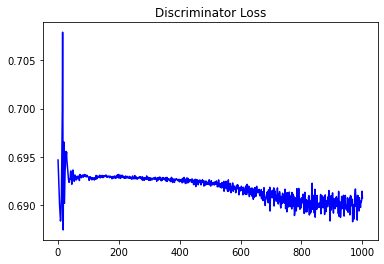

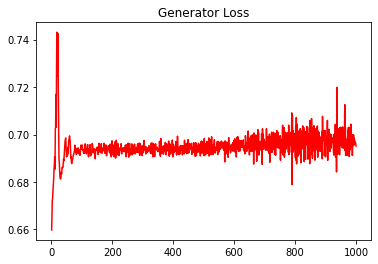

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5265537560961915


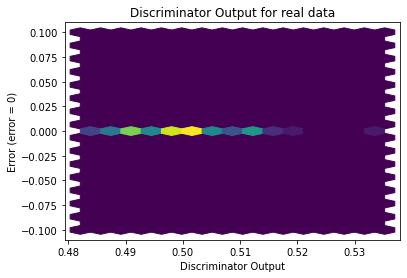

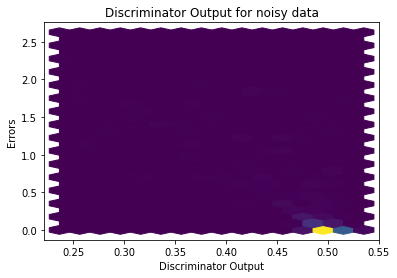

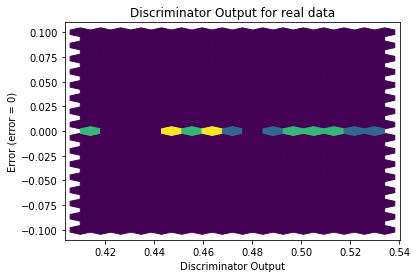

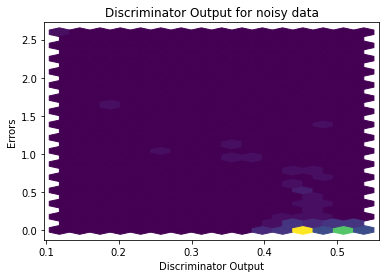

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4759]], requires_grad=True)
